In [ ]:
 ## Refer the folder structure containing image data for two classes, **Cars** and **Bikes**, and are required to refer to this structure before beginning the implementation. The task involves loading all RGB images from both folders, resizing them to a fixed size, normalizing pixel values, and converting each image into a suitable input format for a deep neural network. Appropriate class labels must be assigned, and the combined dataset should be shuffled and split into training and testing sets in an 80:20 ratio. A deep neural network model must then be designed by specifying the input layer, one or more hidden layers with appropriate activation functions, and an output layer for binary classification. The model should be trained using forward propagation, backpropagation, and an optimization algorithm such as gradient descent or its variants, while monitoring the training loss. After training for a fixed number of epochs, predictions must be generated for both training and testing data to compute accuracy. Finally, the loss versus epochs graph should be plotted and the training and testing accuracy reported.

In [25]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [27]:
DATASET_PATH = "/content/drive/MyDrive/Lab-1/transport"   # change if needed
IMG_SIZE = 64

data = []
labels = []

class_map = {
    "cars": 0,
    "bike": 1
}

for class_name in class_map:
    folder = os.path.join(DATASET_PATH, class_name)

    for file in os.listdir(folder):
        path = os.path.join(folder, file)

        img = cv2.imread(path)
        if img is None:
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img = img / 255.0

        data.append(img.flatten())      # DNN input
        labels.append(class_map[class_name])

data = np.array(data)
labels = np.array(labels)

print("Total samples:", len(data))
print("Feature size:", data.shape[1])


Total samples: 785
Feature size: 12288


In [28]:
data, labels = shuffle(data, labels, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    data, labels,
    test_size=0.2,
    random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (628, 12288)
Test : (157, 12288)


In [29]:
model = Sequential([
    Dense(512, activation='relu', input_shape=(IMG_SIZE*IMG_SIZE*3,)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [30]:
model.compile(
    optimizer='adam',                  # GD variant
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [31]:
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_data=(X_test, y_test)
)


Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.5064 - loss: 1.6931 - val_accuracy: 0.4013 - val_loss: 0.8657
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.5500 - loss: 0.8072 - val_accuracy: 0.3949 - val_loss: 1.5937
Epoch 3/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.4943 - loss: 1.0016 - val_accuracy: 0.6306 - val_loss: 0.6093
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.6621 - loss: 0.6318 - val_accuracy: 0.6242 - val_loss: 0.6861
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6252 - loss: 0.6391 - val_accuracy: 0.6752 - val_loss: 0.6046
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.6076 - loss: 0.7119 - val_accuracy: 0.6433 - val_loss: 0.6391
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6810 - loss: 0.5750 - val_accuracy: 0.5478 - val_loss: 0.7615
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - accuracy: 0.7092 - loss: 0.5412 - val_accuracy: 0.6943 -

In [32]:
train_preds = (model.predict(X_train) > 0.5).astype(int)
test_preds  = (model.predict(X_test) > 0.5).astype(int)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [33]:
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 0.7515923380851746
Testing Accuracy : 0.662420392036438


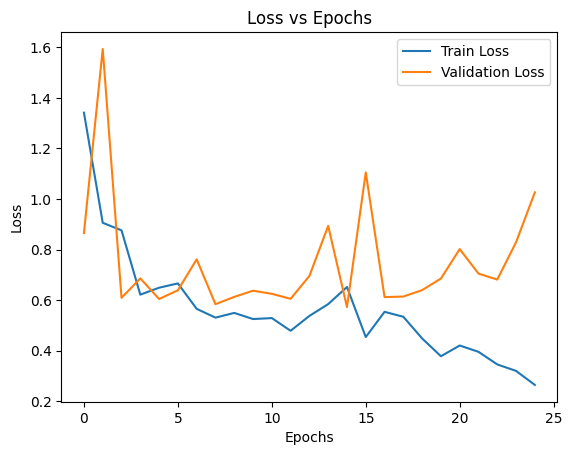

In [34]:
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.show()
